# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо научиться определять рыночную стоимость объектов недвижимости. Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цели исследования:**
1. Определить рыночную стоимость объектов недвижимости.
2. Построить автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факкторы влияют на ценообразование стоимости квартир.

**Ход исследования:**
1. Загрузка данных и изучение общей информации.
2. Предобработка данных.
3. Добавление новых признаков в исходный набор данных.
4. Исследовательский анализ данных.
5. Общий вывод.

**Описание данных:**
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — общая площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

## 1. Загрузка данных и изучение общей информации

Загрузка необходимых библиотек

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загрузка данных и сбор первчиной информации

In [27]:
data = pd.read_csv('apartaments.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Информация о признаках данных

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

## 2. Предобработка данных

Посмортим на пропуски в данных

In [30]:
pd.DataFrame(data.isna().mean()*100,).style.background_gradient('coolwarm')

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799105
floors_total,0.362885
living_area,8.029875
floor,0.000000
is_apartment,88.290645


Если пропуски в значениях нельзя заполнить логически, будем оставлять их, т.к. они могут служить дополнительной информацией. Разберем каждый признак, в котором присутствуют пропуски:
1. Высоту потолков некоторые владельцы могли и не указывать, поэтому оставим эти значения пустыми (признак ceiling_height).
2. Аналогично с ceiling_height поступим и с признаками floors_total (всего этажей в доме), living_area (жилая площадь), kitchen_area (площадь кухни), locality_name (навзвание населенного пункта). 
3. Пропуски в булевом столбце is_apartment заменим значением False, т.к. скорее всего пропуски вызваны тем, что квартира не является апартаментами. 
4. Пропуски в столбце balcony были скорее всего вызваны, что в квартире продавца балконов просто нет. Заменим данные пропуски нулем. 
5. Пропуски в столбцах parks_around3000 и ponds_around3000 могут быть вызваны отсутствием поблизости водоемов и парков. Заполним эти пропуски нулями

Заполнение пропусков

In [31]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['balcony'] = data['balcony'].fillna(value=0)
data['parks_around3000'] = data['parks_around3000'].fillna(value=0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0)

Займемся пропусками в столбце cityCenters_nearest. Эти данные очень важны, т.к. расстояние от центра города, скорее всего, будет сказываться на цене квартиры. В теории, чтобы заполнить пропуски, можно взять названия населенных пунктов из строк, где пропущено расстояние до центра города, и посмотреть расстояние до города в других записях с этим же населенным пунктом и воспользоваться им. Для этого проверим, есть ли такие значения расстояний. Избавимся от неявных дубликатов населенных пунктов.

In [32]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

In [33]:
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Большая Ижора', 'поселок городского типа Большая Ижора')
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Лесогорский', 'поселок городского типа Лесогорский')
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Мга', 'поселок городского типа Мга')
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Назия', 'поселок городского типа Назия')
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Павлово', 'поселок городского типа Павлово')
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Рощино', 'поселок городского типа Рощино')
data['locality_name'] = data['locality_name'].replace(
    'городской поселок Советский', 'поселок городского типа Советский')

Теперь проверим, сможем ли мы поспользоваться расстоянием от какого-нибудь населенного пункта до центра города для заполнения пропуска в данных о квартире из этого же населенного пункта.

In [34]:
unique_nan = data[data['cityCenters_nearest'].isna()]['locality_name'].unique()  # создаем DataFrame с уникальными названиями населенных пунктов, в расстояниях до центра города которых были допущены пропуски
i=0
for item in unique_nan:
    count_of_item = len(data[data['locality_name'] == item])   # общее число записей о квартирах из данного населенного пункта
    count_nan_of_item = data[data['locality_name'] == item]['cityCenters_nearest'].isna().count()  #число записей о квартирах из данного населенного пункта, в столбце с расстоянием до центра города которого есть пропуск
    if count_of_item != count_nan_of_item: # считаем число несовпавших значений
        i+=1
print(i)

0


Из этого нуля понимаем, что у нас не получится заполнить пропуски в расстоянии до центра города. Оставим данные пропуски. Так же пока поступим со столбцами parks_nearest (расстояние для ближайшего парка), ponds_nearest (расстояние до ближайшего водоема). Данные пропуски могут быть вызваны разными причинами, например, отсутствием парков и водоемов по близости, неизвестным точным расстоянием до них или просто напросто продавец не счел нужным указывать эти данные. Пропуски в столбце days_exposition могут быть вызваны тем, что объявление до сих пор не снято. Оставим эти данные в исходном состоянии.<br>

Теперь разберемся с типами данных. Установим в столбце first_day_exposition тип данных с датой и временем. Число балконов и число этажей в доме может быть только целым числом. Изменим тип данных в столбцах floors_total и balcony на int. Так же поступим со столбцами parks_around3000, ponds_around3000. Для этого нам необходимо удалить пустые строки из столбца floors_total (их мало, значит удаление не повлияет на исследование).

In [35]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [36]:
data = data.dropna(subset=['floors_total']).reset_index(drop=True)
data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['last_price'] = data['last_price'].astype('int')

Займемся аномальными значениями в столбце ceiling_height. Посмотрим на статистическую сводку параметра ceiling_height

In [37]:
print(data['ceiling_height'].describe())

count    14495.000000
mean         2.771495
std          1.261445
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


Видим очевидные аномалии в том, что значение высоты потолков достигает 100 метров. Высота потолков в этом наборе данных - это вещественные числа. Возможно, произошла ошибка при сборе некоторых данных. Высоту потолков, которая больше 20 м разделим на 10 и тем самым уберем очевидные аномалии в этом признаке

In [38]:
data['ceiling_height'] = data['ceiling_height'].where(data['ceiling_height'] < 20.0, data['ceiling_height']/10).reset_index(drop=True)

Проверим данные на дублирующие объекты

In [39]:
print('Количество дубликатов:', data.duplicated().sum())

Количество дубликатов: 0


**Итог:**
На первых двух этапах исследования провели следующие работы:
1. загрузили данные и посмотрели на общую структуру данных;
2. обработали пропуски и аномалии в признаках объектов.

## 3. Добавление новых признаков в исходный набор данных

Посчитаем цену одного квадратного метра каждой квартиры по формуле "цена квартиры"/"площадь квартиры" и добавим в столбец price_per_square_meter

In [40]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.370370
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.792079
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.714286
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.100629
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.000000


В столбец week_day занесем день недели публикации объявления (0-понедельник, 1-вторник и т.д.). В столбец month занесем месяц публикации объявления. В столбец year занесем год публикации объявления. В столбец floor_type занесем тип этажа квартиры (первый, последний или другой). В столбец city_nearest_km занесем расстояние до центра города в километрах, округленное до целых значений.

In [41]:
data['week_day'] = pd.DatetimeIndex(data['first_day_exposition']).weekday        #день недели публикации объявления
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month             #месяц публикации объявления
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year               #год публикации объявления
data.loc[data['floors_total'] == data['floor'], 'floor_type'] = 'последний'      #тип этажа квартиры
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data['floor_type'] = data['floor_type'].fillna(value='другой')
data['city_nearest_km'] = np.round(data['cityCenters_nearest']/1000, decimals=0) #расстояние до центра города
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,week_day,month,year,floor_type,city_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,NaN,120370.370370,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,NaN,0,NaN,81.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,90.0,2,574.0,558.0,92785.714286,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14,NaN,9,False,...,84.0,3,234.0,424.0,408176.100629,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121.0,100000.000000,1,6,2018,другой,8.0


**Итог:**
На третьем этапе исследования исходные данные были дополнены следующими признаками:
- день недели публикации объявления (week_day);
- месяц публикации объявления (month);
- год публикации объявления (year);
- тип этажа квартиры (floors_total);
- расстояние до центра города (city_nearest_km).

## 4. Исследовательский анализ данных

Построим гистограммы для различных параметров. Начнем с общей площади квартиры

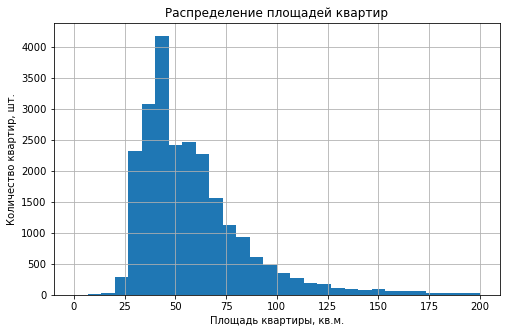

In [55]:
plt.figure(figsize=(8,5))
data['total_area'].hist(bins=30, range=(0,200))
plt.title('Распределение площадей квартир')
plt.xlabel('Площадь квартиры, кв.м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Как видно из гистограммы, чаще выставляли на продажу квартиры с площадью от 25 до 50 квадратных метров. Наблюдается резкое снижение количества квартир от 70 квадратных метров. Квартир с площадью, начиная с 200-250 квадратных метров, редко выставляли на продажу.

Построим гистограмму для жилой площади продаваемых квартир.

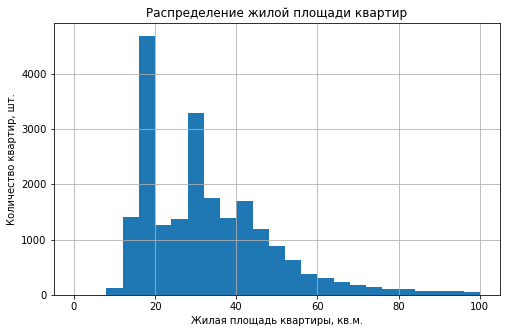

In [65]:
plt.figure(figsize=(8,5))
data['living_area'].hist(bins=25, range=(0,100))
plt.title('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь квартиры, кв.м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большинство продаваемых квартир имели жилую площадь в диапазоне от 10 до 50 квадратных метров. Заметны пики выставления квартир на продажу с жилой площадью от 16 до 20 кв.м. и от 28 до 32 кв.м. Квартиры с жилой площадью больше 50 кв.м. выставляют на продажу значительно реже.

Построим гистограмму для площади кухни продаваемых квартир.

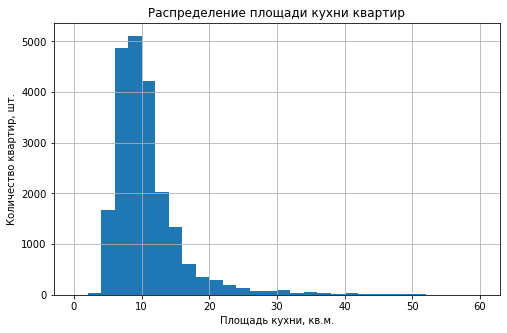

In [69]:
plt.figure(figsize=(8,5))
data['kitchen_area'].hist(bins=30, range=(0,60))
plt.title('Распределение площади кухни квартир')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Чаще всего кухни продаваемых квартир имели площадь от 4 до 16 квадратных метров. Намного реже в продаже появлялись квартиры от 16 до 30 кв.м. Квартиры с кухнями, площадь которых выше 30 кв.м. большая редкость.

Построим гистограмму для цены продаваемых квартир.

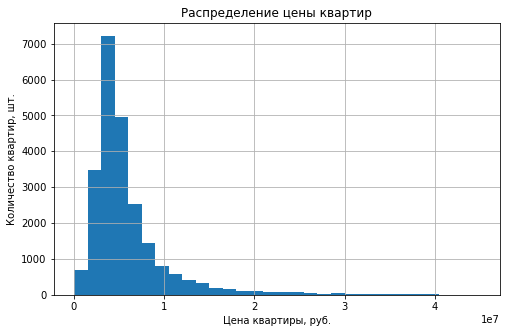

In [101]:
plt.figure(figsize=(8,5))
data['last_price'].hist(bins=30, range=(1.1e+04, 4.5e+07))
plt.title('Распределение цены квартир')
plt.xlabel('Цена квартиры, руб.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Более подробно рассмотрим квартиры, цены которых ниже 10 млн рублей

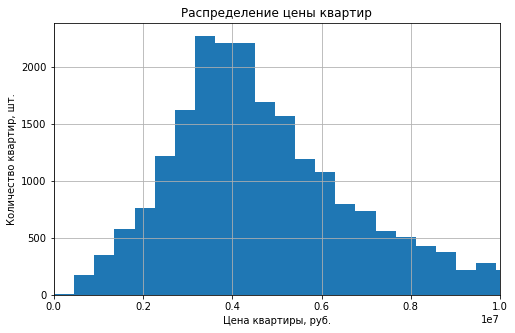

In [102]:
plt.figure(figsize=(8,5))
data['last_price'].hist(bins=100, range=(1.1e+04, 4.5e+07))
plt.xlim(0, 1.0e+07)
plt.title('Распределение цены квартир')
plt.xlabel('Цена квартиры, руб.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большинство квартир имеют стоимость до 10 млн рублей. После этой отметки количество квартир резко сокращается. После рассмотрения квартир со стоимостью до 10 млн рублей можно сказать, что самая популярная стоимость на жилье в Санкт-Петербурге находится в диапазоне примерно от 2 млн до 7 млн

Построим гистограмму по количеству комнат в продаваемых квартирах.

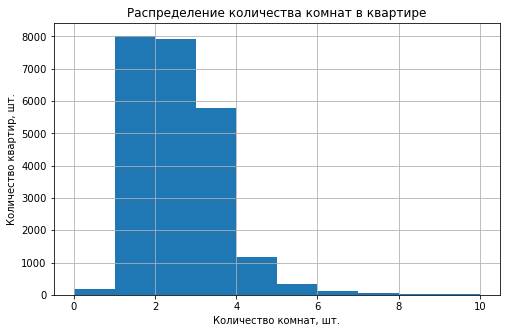

In [75]:
plt.figure(figsize=(8,5))
data['rooms'].hist(bins=10, range=(0,10))
plt.title('Распределение количества комнат в квартире')
plt.xlabel('Количество комнат, шт.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Однокомнатные и 2-х комнатные квартиры наиболее часто выставляют на продажу, чуть реже 3-х комнатные. 4-х и 5-ти комнатных квартиры продают намного реже, как и студий (число комнат равно 0). Квартиры с 8-ю комантами и больше в продаже почти не встречаются.

Построим гистограмму по высоте потолков в продаваемых квартирах.

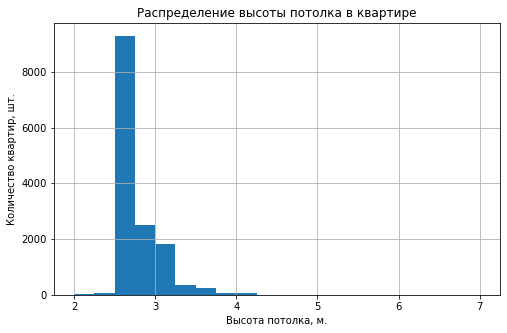

In [77]:
plt.figure(figsize=(8,5))
data['ceiling_height'].hist(bins=20, range=(2,7))
plt.title('Распределение высоты потолка в квартире')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Более рассмотрим квартиры с потолками от 2 до 4 метров

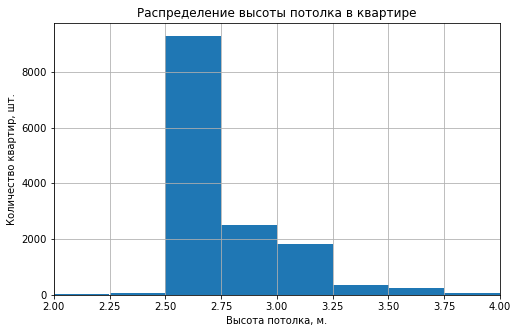

In [78]:
plt.figure(figsize=(8,5))
data['ceiling_height'].hist(bins=20, range=(2,7))
plt.xlim(2,4)
plt.title('Распределение высоты потолка в квартире')
plt.xlabel('Высота потолка, м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большинство продаваемых квартир имеют высоту потолков от 2.5 до 2.75 метров. Число продаваемых квартир с высотой потолков в промежутке от 2.75 до 3.25 намного меньше. Квартир с потолками выше 4 метров почти нет в продаже.

Построим гистограмму этажей, на которых находятся продаваемые квартиры, а также гистаграмму типов этажа квартиры ("первый", "последний", "другой").

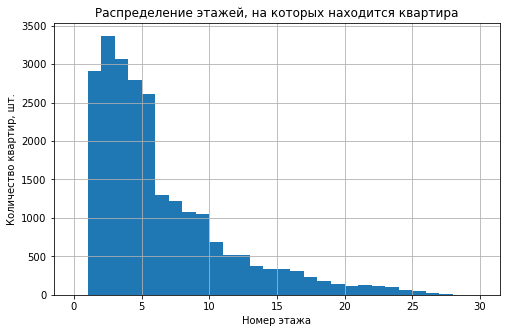

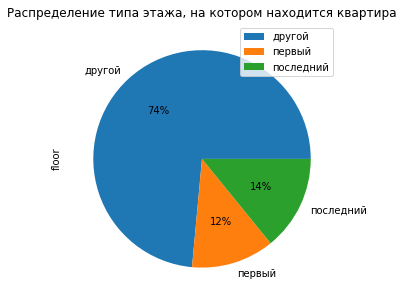

In [81]:
plt.figure(figsize=(8,5))
data['floor'].hist(bins=30, range=(0,30))
plt.title('Распределение этажей, на которых находится квартира')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир, шт.')
plt.show()

hist_table = data.pivot_table(index='floor_type', values='floor', aggfunc='count')
hist_table.plot(kind='pie', y='floor', figsize=(5,5), autopct='%1.0f%%')
plt.title('Распределение типа этажа, на котором находится квартира')
plt.show()

Чаще всего продаваемые квартиры находятся на 2-ом этаже, чуть реже на 1-ом, 3-ем, 4-ом и 5-ом этажах. Начиная с 6 этажа число продаваемых квартир резко снижается. Квартир на 25 этаже и выше практически нет в продаже. Также можно отметить, что 12 процентов всех продаваемых квартир находится на первом этаже, 14 процентов - на последнем.

Построим гистограмму количества этажей в домах, где продавались квартиры

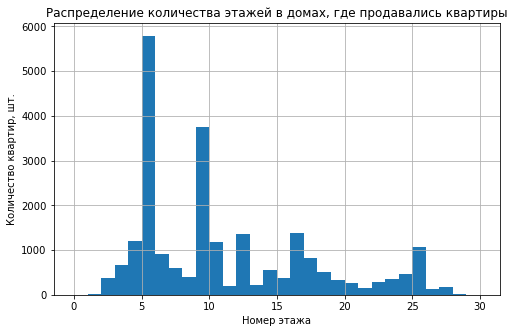

In [105]:
plt.figure(figsize=(8,5))
data['floors_total'].hist(bins=30, range=(0,30))
plt.title('Распределение количества этажей в домах, где продавались квартиры')
plt.xlabel('Номер этажа')
plt.ylabel('Количество квартир, шт.')
plt.show()

Квартиры чаще всего продавались в 5-ти и 9-ти этажных домах. Это может быть из-за большего числа именно таких домов. Меньшей популярностью пользуются дома с 4-мя, 6-тью, 10-тью, 12-тью, 16-тью этажами. Продаваемых квартир в других домах еще меньше.

Построим гистограмму числа квартир с определенным расстоянием до центра города(в метрах).

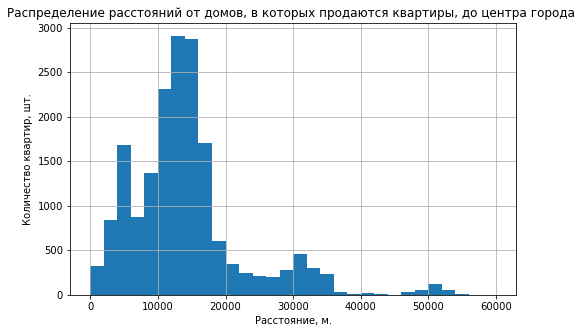

In [85]:
plt.figure(figsize=(8,5))
data['cityCenters_nearest'].hist(bins=30, range=(0,60000))
plt.title('Распределение расстояний от домов, в которых продаются квартиры, до центра города ')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Как видим, большинство квартир продается в пределах 10-15 тыс. метров или в 10-15 километрах от центра города. В пределах 10 километров от центра города квартир продается меньше, но все равно обеспечен приемлемый выбор. В 20-ти километрах от центра города и дальше предложений о продаже квартир значительно меньше.

Построим гистограмму числа квартир с определенным расстоянием до ближайшего аэропорта(в метрах).

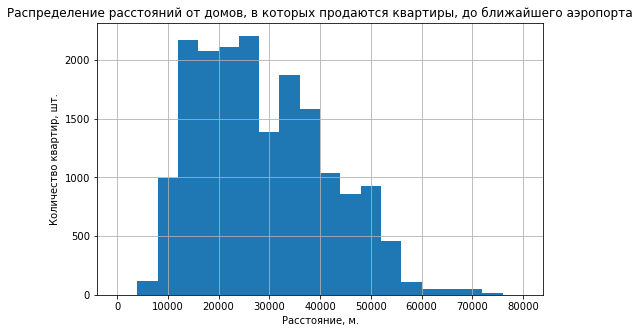

In [86]:
plt.figure(figsize=(8,5))
data['airports_nearest'].hist(bins=20, range=(0, 80000))
plt.title('Распределение расстояний от домов, в которых продаются квартиры, до ближайшего аэропорта')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Квартиры по близости от аэропорта не отличаются популярностью. Чаще всего продаваемые квартиры находятся в 10-30 километрах от аэропорта. Так же продают квартиры в 40-50 километрах, но уже реже.

Посмотрим на то, как часто продают квартиры рядом с парком.

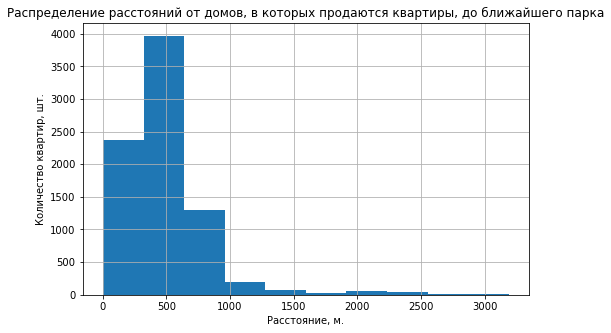

In [87]:
plt.figure(figsize=(8,5))
data['parks_nearest'].hist()
plt.title('Распределение расстояний от домов, в которых продаются квартиры, до ближайшего парка')
plt.xlabel('Расстояние, м.')
plt.ylabel('Количество квартир, шт.')
plt.show()

Большинство продаваемых квартир находятся в 500 метрах от парка. Квартиры в километре от парка тоже продаются, а вот дальше идет резкий спад.

Посмотрим, в какие дни недели и месяцы чаще всего размещали объявления.

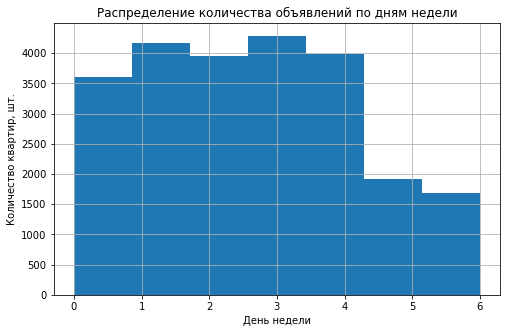

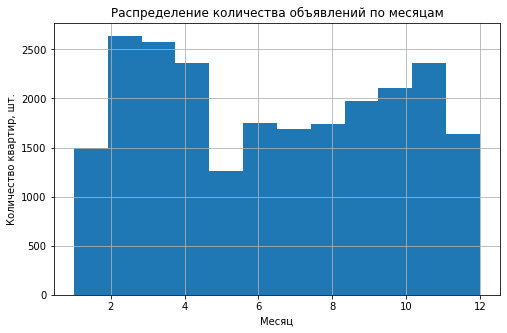

In [88]:
plt.figure(figsize=(8,5))
data['week_day'].hist(bins=7)
plt.title('Распределение количества объявлений по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество квартир, шт.')
plt.show()

plt.figure(figsize=(8,5))
data['month'].hist(bins=12)
plt.title('Распределение количества объявлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир, шт.')
plt.show()

Как видим, чаще всего объвления выкладывают в будние дни, а в выходные этом плане идет спад. Что касается месяца, то самое популярное время для размещения объявления явлется конец зимы и начало весны. Заметен резкий провал в мае, но затем идет подъем к уровню, близкому к пику.

Посмотрим, как быстро продавались квартиры. Построим соответствующую гистограмму.

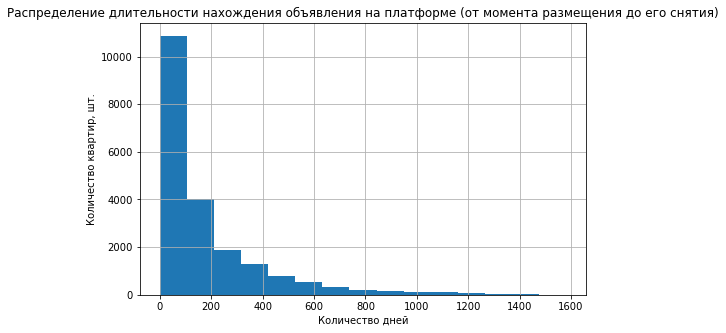

In [96]:
plt.figure(figsize=(8,5))
data['days_exposition'].hist(bins=15)
plt.title('Распределение длительности нахождения объявления на платформе (от момента размещения до его снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир, шт.')
plt.show()

Посмотрим на то же распределение под другим углом

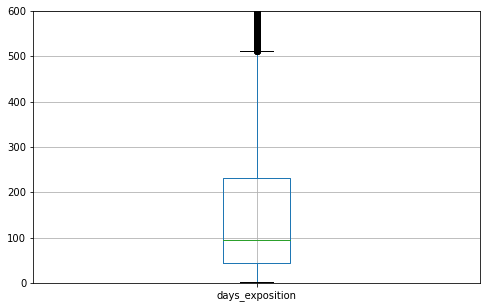

In [155]:
plt.figure(figsize=(8,5))
data.boxplot(column='days_exposition')
plt.ylim(0,600)
plt.show()

Можно увидеть, что большинство квартир продавались в первые 100 дней. Определим какие продажи можно считать необычно долгими, а какие достаточно быстрыми. Все те квартиры, которые продавались дольше 500 дней (около 1.4 года) можно считать необычно долгими. Есть и достаточно быстрые продажи - где квартиры продавались в первые 50 дней после размещения объявления.

Посмотрим, как различные факторы влияют на стоимость объекта. Начнем с общей площади объекта.

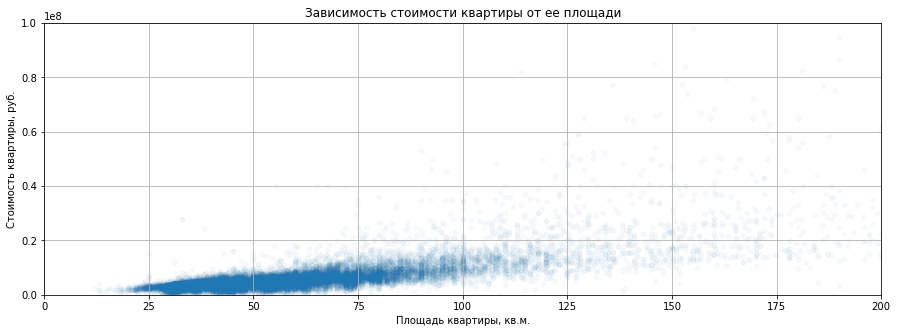

Коэффициент корреляции Пирсосна: 0.6535810085611218


In [120]:
data.plot(x='total_area', y='last_price', grid=True, figsize=(15,5), kind='scatter', alpha=0.03)
plt.xlim(0,200)
plt.ylim(0,1e+8)
plt.title('Зависимость стоимости квартиры от ее площади')
plt.xlabel('Площадь квартиры, кв.м.')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()
print('Коэффициент корреляции Пирсосна:', data['total_area'].corr(data['last_price']))

Заметен линейный рост цен с увеличением площади квартиры до 85 квадратных метров. Затем начинается значительные колебания в цене и очевидную зависимость цены квартиры от площади сложно отследить. Коэффициент корреляции Пирсона подтверждает, что линейная зависимость существует, но явно выражена не на всем наборе данных

Посмотрим зависимость цены квартиры от жилой площади

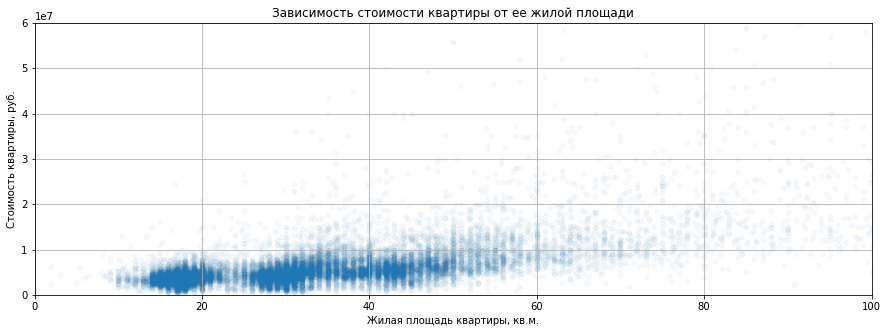

Коэффициент корреляции Пирсосна: 0.5663955721081744


In [121]:
data.plot(x='living_area', y='last_price', grid=True, figsize=(15,5), kind='scatter', alpha=0.03)
plt.xlim(0,100)
plt.ylim(0,0.6e+8)
plt.title('Зависимость стоимости квартиры от ее жилой площади')
plt.xlabel('Жилая площадь квартиры, кв.м.')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()
print('Коэффициент корреляции Пирсосна:', data['living_area'].corr(data['last_price']))

Менее очивидная линейная зависимость между ценой квартиры и жилой площадью с ее ростом до 40-50 квадратных метров. Далее линейную зависимоть проследить сложно, т.к. появляются более частые скачки в цене. Здесь коэффициент корреляции Пирсона также подтверждает, что линейная зависимость существует, но явно выражена не на всем наборе данных

Посмотрим зависимость цены квартиры от площади кухни

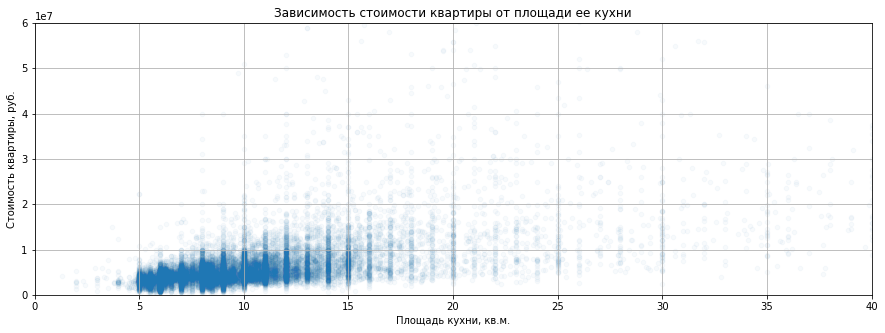

Коэффициент корреляции Пирсосна: 0.5663955721081744


In [122]:
data.plot(x='kitchen_area', y='last_price', grid=True, figsize=(15,5), kind='scatter', alpha=0.03)
plt.xlim(0,40)
plt.ylim(0,0.6e+8)
plt.title('Зависимость стоимости квартиры от площади ее кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()
print('Коэффициент корреляции Пирсосна:', data['living_area'].corr(data['last_price']))

Прослеживается линейная зависимость цены квартиры от площади ее кухни при росте второго параметра до 13 квадратных метров, затем эта зависимость ослабевает. Более частыми становятся скачки цен. Коэффициент корреляции Пирсона подтверждает, что линейная зависимость существует, но явно выражена не на всем наборе данных.

Посмотрим зависимость цены квартиры от числа комнат в квартире

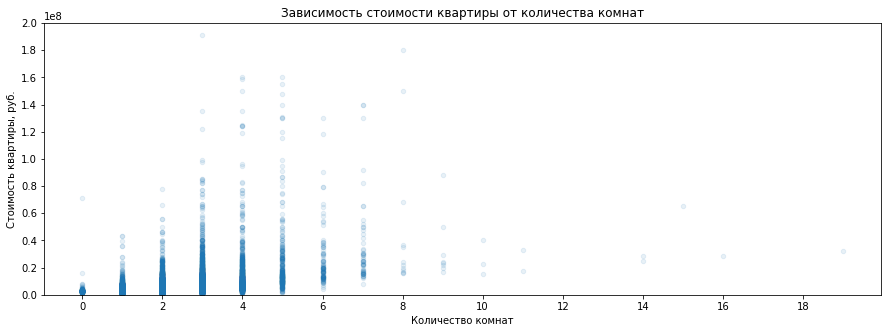

In [124]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, figsize=(15,5), ylim=(0, 2e+8))
plt.title('Зависимость стоимости квартиры от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость квартиры, руб.')
plt.locator_params(axis='both', nbins=15)
plt.show()

Рост цены наблюдается с ростом числа комнат только до 3, затем цена квартир ведет себя неравномерно. Это можно объяснить тем, что с ростом числа комнат до 3 растет и общая площадь квартиры (на данный момент основной фактор влияния на цену). Далее рост площади не так явно выражен, да и число продаваемых квартир с увеличением числа комнат уменьшается.

Рассмотрим влияние этажа, на котором находится квартира на ее цену.

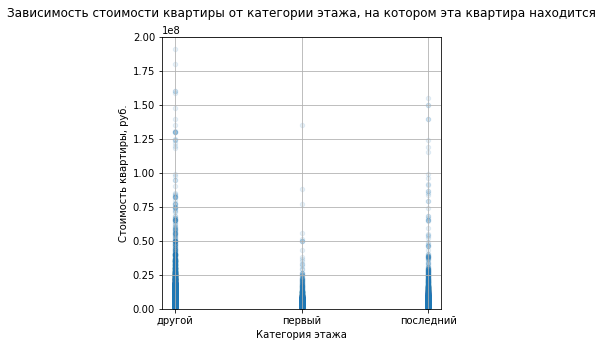

In [133]:
data.plot(x='floor_type', y='last_price', kind='scatter', alpha=0.1, figsize=(5,5),ylim=(0, 2e+8), grid=True)
plt.title('Зависимость стоимости квартиры от категории этажа, на котором эта квартира находится', pad=20)
plt.xlabel('Категория этажа')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Квартиры на первом этаже чаще всего продают по самой маленькой цене по сравнению с квартирами на последнем этаже и на других эатажах. Далее идут квартиры на послденем этаже (они стоят чуть дороже тех, которые на первом этаже). Ну и квартиры ни на первом, ни на последнем этажах прибавляют в средней стоимости.

Рассмотрим влияние дня недели, месяца и года публикации объявления на цену квартиры.

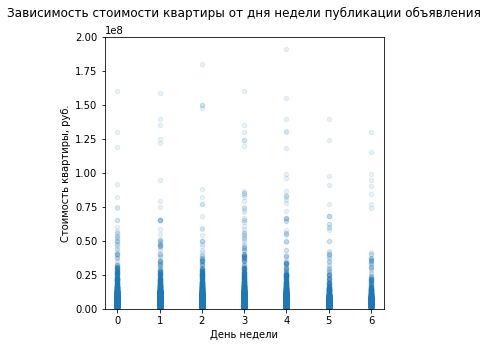

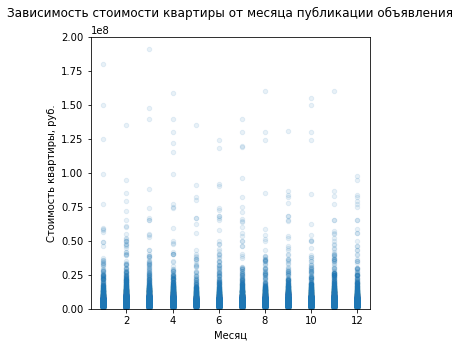

In [136]:
data.plot(x='week_day', y='last_price', kind='scatter', alpha=0.1, figsize=(5,5),ylim=(0, 2e+8))
plt.title('Зависимость стоимости квартиры от дня недели публикации объявления', pad=20)
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

data.plot(x='month', y='last_price', kind='scatter', alpha=0.1, figsize=(5,5),ylim=(0, 2e+8))
plt.title('Зависимость стоимости квартиры от месяца публикации объявления', pad=20)
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

Не наблюдается зависимость цены квартиры от дня недели и месяца размещения объявлений. Есть некоторые спады и подъемы в цене, но они напоминают спады и подъемы в количестве объявлений, распределенных так же по дням недели и месяцам. Даные факторы не могут быть ключевыми при определении цены на квартиру

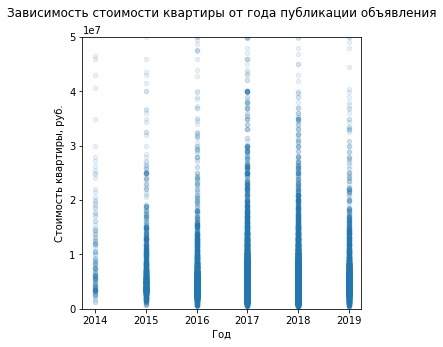

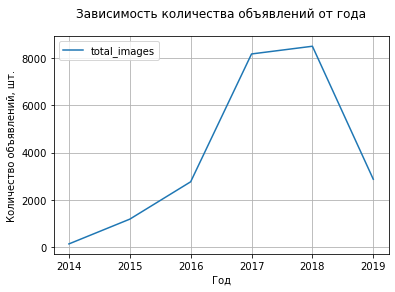

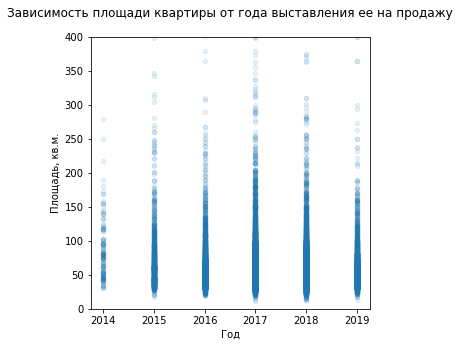

In [145]:
data.plot(x='year', y='last_price', kind='scatter', alpha=0.1, figsize=(5,5),ylim=(0, 0.5e+8))
plt.title('Зависимость стоимости квартиры от года публикации объявления', pad=20)
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, руб.')
plt.show()

data.pivot_table(index='year', values='total_images', aggfunc='count').plot(grid=True)
plt.title('Зависимость количества объявлений от года', pad=20)
plt.xlabel('Год')
plt.ylabel('Количество объявлений, шт.')
plt.show()

data.plot(x='year', y='total_area', kind='scatter', alpha=0.1, figsize=(5,5),ylim=(0, 400))
plt.title('Зависимость площади квартиры от года выставления ее на продажу', pad=20)
plt.xlabel('Год')
plt.ylabel('Площадь, кв.м.')
plt.show()

Наблюдается рост цен на квартиры с 2014 до 2017 года. В 2019 году наблюдается небольшой спад. Это можно объяснить количеством продаваемых квартир, т.к. имено это значение также растет до 2017 года, а в 2019 году наблюдается спад, или площадью квартир, выставляемых на продажу.

Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах с наибольшим числом объявлений. Выделим 10 населенных пунктов с самым большим количеством объявлений.

In [144]:
popular_locality = data.pivot_table(index='locality_name', values='price_per_square_meter', aggfunc=['count', 'median'])
popular_locality.columns = ['count', 'median']
print(popular_locality.sort_values(by='count', ascending=False).head(10))

                   count         median
locality_name                          
Санкт-Петербург    15651  104774.535809
поселок Мурино       552   86059.293995
поселок Шушары       439   76829.268293
Всеволожск           398   65789.473684
Пушкин               369  100000.000000
Колпино              338   74723.748474
поселок Парголово    327   91642.857143
Гатчина              307   67796.610169
деревня Кудрово      299   91860.465116
Выборг               237   58158.319871


Самое большое количество объявлений размещено с квартирами именно в самом городе Санкт-Петербург. Среди топ 10 по частоте выставления квартир на продажу наибольшую стоимость за квадратный метр имеет город Санкт-Петербург, а наименьшую - Выборг

Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра от центра города

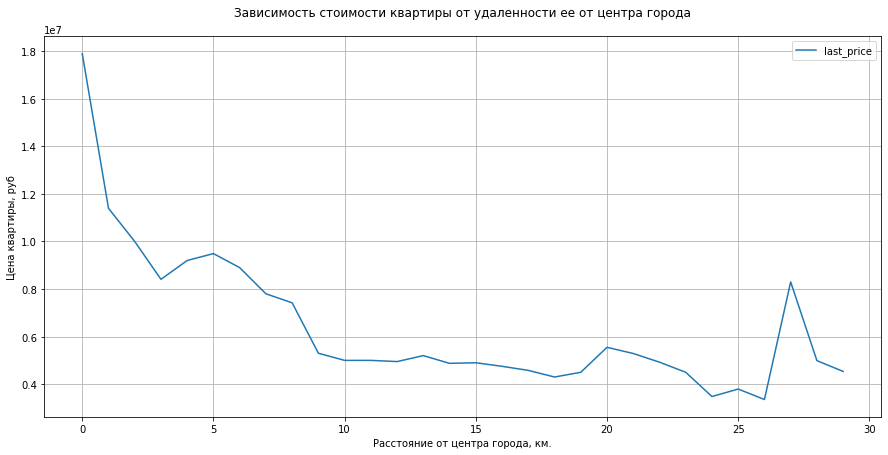

In [153]:
flat_city = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_nearest_km', 
                                                                        values='last_price',
                                                                        aggfunc='median')
flat_city.plot(grid = True, figsize=(15,7))
plt.title('Зависимость стоимости квартиры от удаленности ее от центра города', pad=20)
plt.xlabel('Расстояние от центра города, км.')
plt.ylabel('Цена квартиры, руб')
plt.show()

Видим, что чем дальше от центра города, тем меньше цена на жилье. Но в районе 27-ми километров от центра города существует резкий скачок вверх в цене. Это может быть из-за того, что в данном районе присутствует квартира с характеристиками, резко отличающимися по данному району.

**Итог:**
На четвертом этапе исследования были проделаны следующие работы:
1. Рассмотрены распределения различных признаков продаваемых квартир (площади, цены, количества комнат и т.д.).
2. Определено влияние на стоимость продаваемой квартиры ее площади, количства комнат, типа этажа, даты выставления на продажу и удаленности от центра города. 

## 5. Общий вывод

По данным архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет было произведено исследование, по которому можно сделать следующие выводы:
1. Самыми популярными квартирами, выставленными на продажу в Санкт-Петербурге, являются с площадью до 70 квадратных метров. Затем, при увеличении квадратуры, число объявлений снижается.
2. В независимсоти от статуса культурной сталицы России, здесь присутствует огромный выбор квартир со стоимостью до 10млн рублей.
3. Не смотря на то, что большинство квартир в Санкт-Петербурге с высотой потолков от 2.5 до 2.75 метров, пользуются также популярностью квартиры с потолками высотой до 3.25 метров.
4. Около 85% всех продаваемых квартир находятся в пределах 20 км от центра города.
5. Первым критерием при формировании цены на жилье является его площадь. Так, на жилье до 75 квадратных метров установлена средняя цена до 1 млн рублей. От 75 до 125 квадратных метров средняя цена поднимается до 2-х млн рублей, но также присутствуют скачки цен до 6 млн. После 125 кв.м. цена становится менее предсказуемой (тут цена скачет от 2 до 40 млн). Также можно отметить, что заметен линейный рост цен с увеличением площади квартиры до 85 квадратных метров. Затем начинается значительные колебания в цене и очевидную зависимость цены квартиры от площади сложно проследить.
6. Вторым критерием при формировании цены на жилье является то, на каком этаже располагается продаваемый объект. Так, квартиры на первом этаже прекращают активно продаваться после 2.5 млн рублей. На последнем этаже активные продажи прекращаются на отметке в 3-4 млн рублей. Ну и на остальных этажах квартиры часто продаются до 7.5 млн рублей.
7. Последним критерием формировании цены на жилье является удаленность его от центра города. При отдалении от центра города средняя цена уменьшается с 13.5 до 9.5 млн рублей. Если же удалиться еще на 5 километров цена уменьшается еще на 4 млн. Ну и наконец при удалении на 25 километров цена снижается до 4 млн рублей.
